In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#creating the grid
a=2
N=600
x = np.linspace(0,a,N+1)
Delta_x = x[1]-x[0]

#constants AMU
hbar =1
m =1

In [3]:
#creating the differential operator
M = np.diag(-2*np.ones(N-1)) + np.diag(np.ones(N-2),1)+ np.diag(np.ones(N-2),-1)
print(M)
print(M.shape)

[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]
(599, 599)


In [4]:
#hamiltonian
H = -hbar**2/(2*m)* 1/(Delta_x)**2 * M

#solve the equation
E, psi = np.linalg.eigh(H)

In [5]:
#to access by psi[n]
psi = psi.T

In [6]:
#normalise
def integral(f, axis=0):
    return np.sum(f*Delta_x, axis=axis)

norms = integral(psi**2)
psi = psi/np.sqrt(norms)

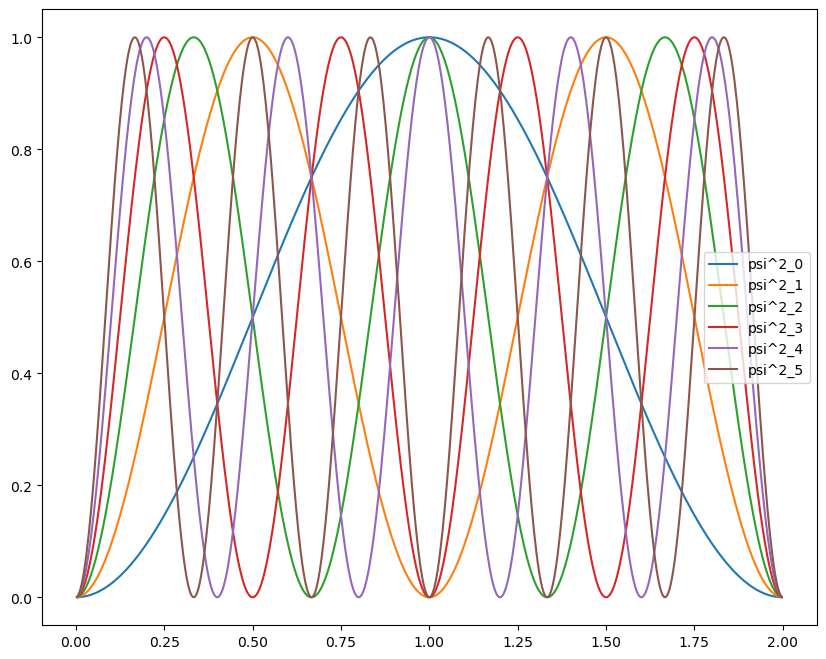

In [7]:
plt.figure(figsize=(10,8))

for n in range(0,6):
    plt.plot(x[1:-1], psi[n]**2, label = 'psi^2_{}'.format(n))
    plt.legend()

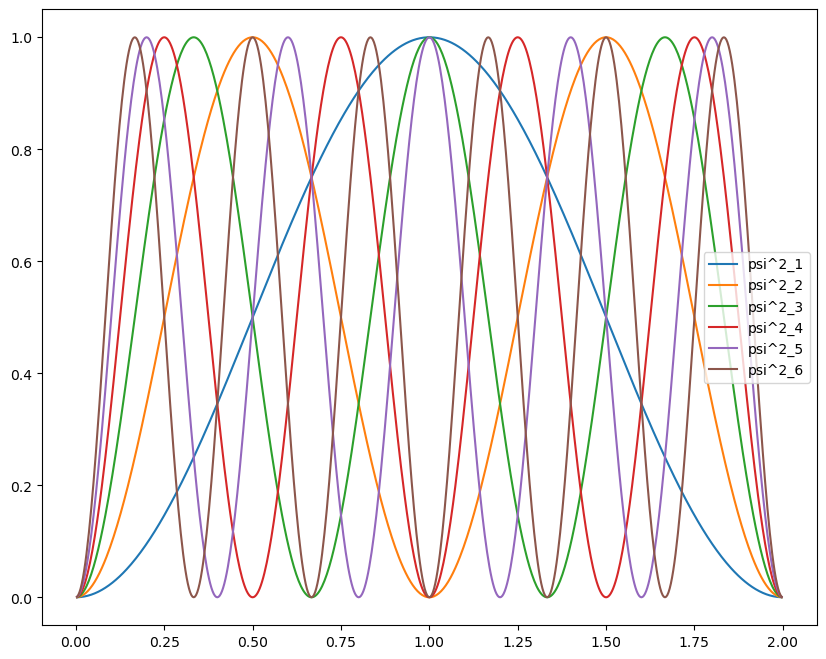

In [8]:
def true_psi(n,x):
    return np.sqrt(2/a)*np.sin(n*np.pi*x/a)

plt.figure(figsize=(10,8))

for n in range(1,7):
    plt.plot(x[1:-1], true_psi(n, x[1:-1])**2, label = 'psi^2_{}'.format(n))
    plt.legend()

In [9]:
#compare the obtained and true energies.

def energy(n):
    return hbar**2 * np.pi**2 * n**2/(2*m*a**2)
    
def relative_error(theo, obs):
    return abs( (theo-obs)/theo)*100

for n in range(0,6):
    print('Obtained energy: {:.3f}'.format(E[n]))
    print('True energy: {:.3f}'.format(energy(n+1)))
    print('Relative error: {:.3f}'.format(relative_error(energy(n+1), E[n])))
    

Obtained energy: 1.234
True energy: 1.234
Relative error: 0.000
Obtained energy: 4.935
True energy: 4.935
Relative error: 0.001
Obtained energy: 11.103
True energy: 11.103
Relative error: 0.002
Obtained energy: 19.738
True energy: 19.739
Relative error: 0.004
Obtained energy: 30.841
True energy: 30.843
Relative error: 0.006
Obtained energy: 44.410
True energy: 44.413
Relative error: 0.008
